In [5]:
pip install pandas transformers matplotlib numpy torch

Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 2.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.3 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 3.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 46.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 63.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 56.5 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 44.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import pandas as pd 
from transformers import pipeline 
import matplotlib.pyplot as plt 
import numpy as np 

In [4]:
pip install tf-keras

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.6 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#pip install 'transformers[torch]'

In [7]:
classifier = pipeline("text-classification", 
                      model="j-hartmann/emotion-english-distilroberta-base", 
                      return_all_scores=False)

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/home/ucloud/.local/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [8]:
df = pd.read_csv('../in/Game_of_Thrones_Script.csv')

In [9]:
df.head()

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.


In [12]:
sub = df.iloc[0:20]

In [17]:
sub.to_csv('../in/Got_subset.csv')

In [18]:
df.isnull().values.any()

True

In [3]:
df_labels = pd.read_csv('../in/GoT_labelled.csv')

In [5]:
df_labels.head()

,Unnamed: 0,Release Date,Season,Episode,Episode Title,Name,Sentence,label,score
0,0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,disgust,0.840084
1,1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,disgust,0.611700
2,2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,surprise,0.714382
3,3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,neutral,0.911425
4,4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,fear,0.420811


In [14]:
testy = df_labels.groupby(['Season', 'label']).size().unstack().reset_index()

In [ ]:
df_labelled = pd.read_csv('../in/GoT_labelled.csv')

labels_count_df = df_labelled.groupby(['Season', 'label']).size().unstack().reset_index()

n_sentences = list(df_labelled.groupby('Season').size())

In [93]:
def count_frequencies(count_df, n_sentences):

    counts_list = []

    for i in range(len(count_df)):
        counts = list(count_df.iloc[i, 1:])

        counts_freq = []

        for n in counts:
            freq = n / n_sentences[i]
            counts_freq.append(freq)

        counts_list.append(counts_freq)
    
    return counts_list

In [97]:
def plot_grid(n_rows, n_cols, counts_list, names):
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 20))

    colors = ['blue', 'red', 'green', 'purple', 'pink', 'orange', 'yellow']

    s = 0

    for i in range(n_rows):
        for j in range(n_cols):
                axes[i][j].bar(names, counts_list[s], color=colors)
                axes[i][j].set_title(f'Frequency of emotion labels for Season {s + 1}')
                axes[i][j].set_ylabel('label count / total sentences per season')
                s += 1
    
    plt.savefig('../out/frequency_per_season.png')

In [98]:
def plot_seasons_freq(labelled_df):

    count_df = labelled_df.groupby(['Season', 'label']).size().unstack().reset_index()

    n_sentences = list(labelled_df.groupby('Season').size())

    counts_list = count_frequencies(count_df, n_sentences)

    names = list(count_df.columns[1:])

    plot_grid(4, 2, counts_list, names)

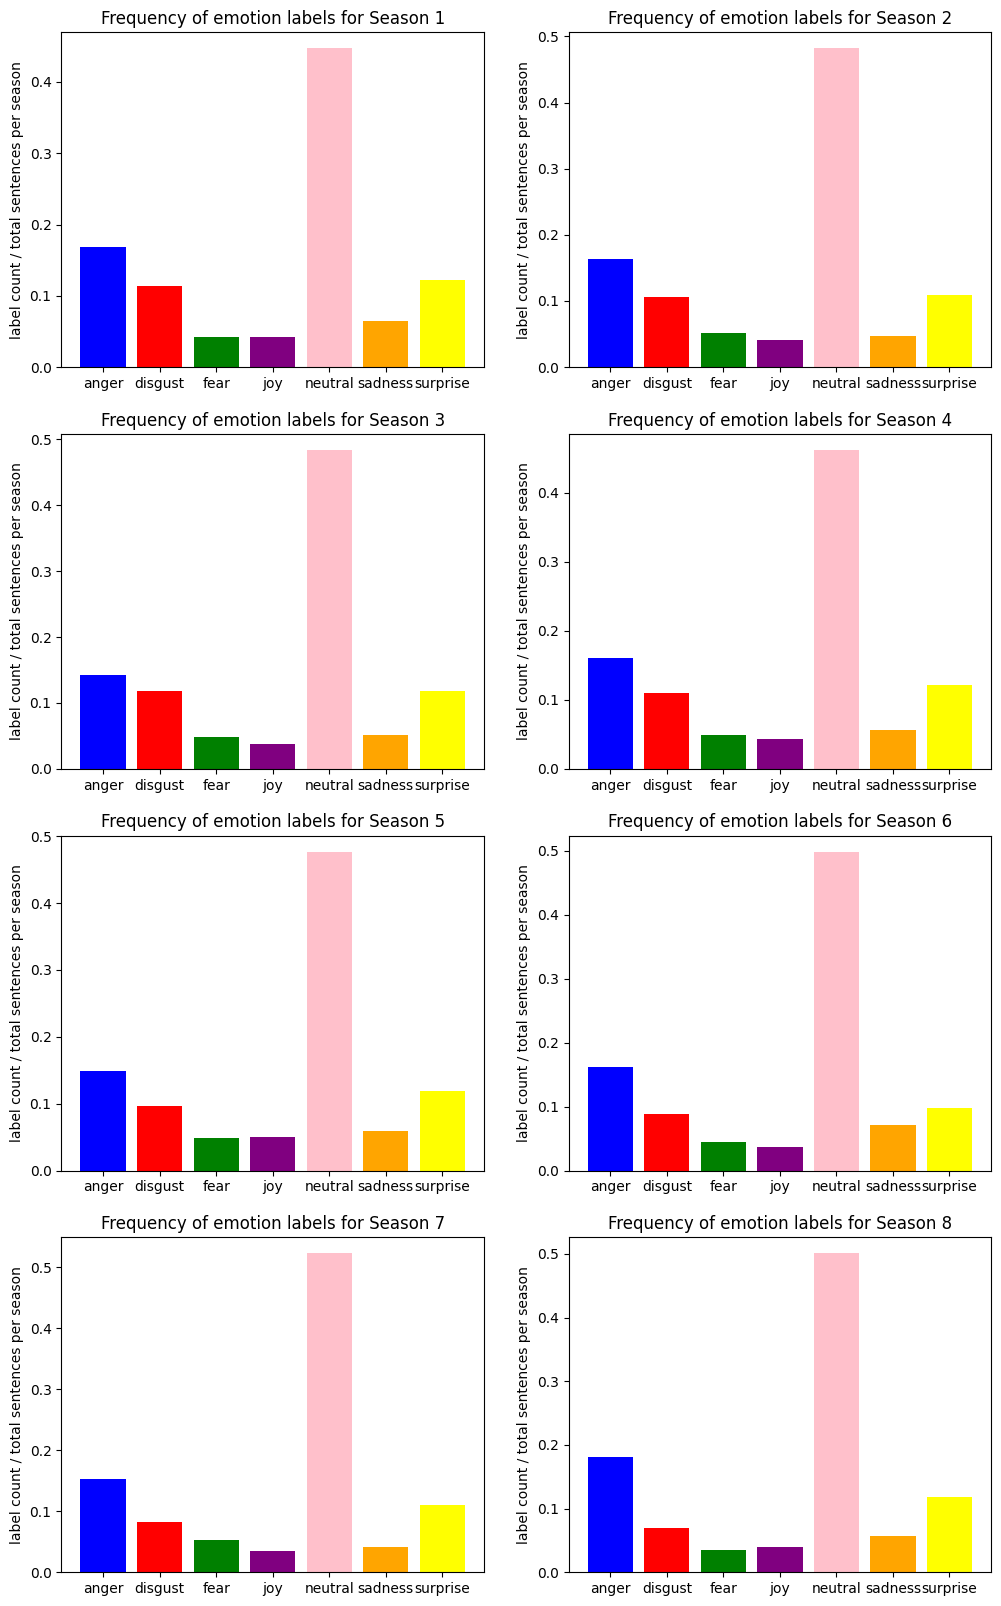

In [99]:
plot_seasons_freq(df_labels)

In [17]:
names = list(testy.columns[1:])

In [106]:
total_counts = list(df_labels.groupby('label').size())

In [111]:
rel_freqs = [n / len(df_labels) for n in total_counts]

In [119]:
labels = list(np.sort(df_labels['label'].unique()))

In [120]:
labels

['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']

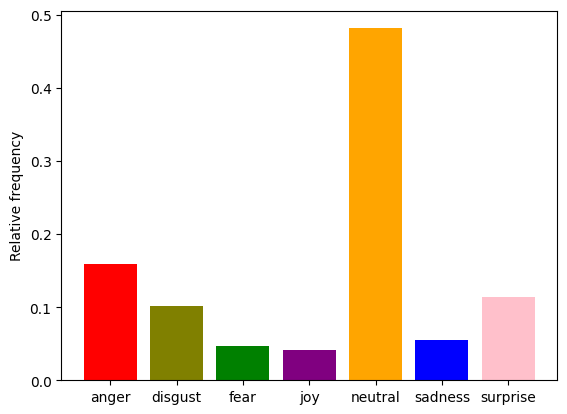

In [127]:
fig, ax = plt.subplots()

bar_labels = labels

colors = ['red', 'olive', 'green', 'purple', 'orange', 'blue', 'pink']

ax.bar(labels, rel_freqs, label=bar_labels, color=colors)

ax.set_ylabel('Relative frequency')
#ax.set_title('Emotion Label')

plt.savefig('../out/frequency_across_seasons.png')


In [81]:
df_labels.query("Season == 'Season 1'")

,Unnamed: 0,Release Date,Season,Episode,Episode Title,Name,Sentence,label,score
0,0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,disgust,0.840084
1,1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,disgust,0.611700
2,2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,surprise,0.714382
3,3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,neutral,0.911425
4,4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,fear,0.420811
...,...,...,...,...,...,...,...,...,...
3174,3174,2011-06-19,Season 1,Episode 10,Fire and Blood,daenerys targaryen,ls that what you fear? You will be my khalasar...,fear,0.979558
3175,3175,2011-06-19,Season 1,Episode 10,Fire and Blood,daenerys targaryen,"Ser Jorah, bind this woman to the pyre. You sw...",anger,0.589398
3176,3176,2011-06-19,Season 1,Episode 10,Fire and Blood,mirri maz duur,You will not hear me scream.,fear,0.735219
3177,3177,2011-06-19,Season 1,Episode 10,Fire and Blood,daenerys targaryen,I will. But it is not your screams I want. Onl...,anger,0.447110


In [82]:
n_sentences = list(df_labels.groupby('Season').size())

In [83]:
n_sentences

[3179, 3914, 3573, 3446, 3035, 2852, 2442, 1466]

In [91]:
testy

label,Season,anger,disgust,fear,joy,neutral,sadness,surprise
0,Season 1,534,360,136,133,1422,204,390
1,Season 2,642,414,202,159,1887,182,428
2,Season 3,511,420,173,136,1729,183,421
3,Season 4,551,377,167,150,1591,193,417
4,Season 5,453,294,146,154,1447,180,361
5,Season 6,463,254,127,105,1421,205,277
6,Season 7,373,201,131,86,1277,103,271
7,Season 8,265,101,52,58,734,83,173


In [89]:
counts_list = []

for i in range(len(testy)):
    counts = list(testy.iloc[i, 1:])

    counts_percent = []

    for n in counts:
        percent = n / n_sentences[i]
        counts_percent.append(percent)

    counts_list.append(counts_percent)

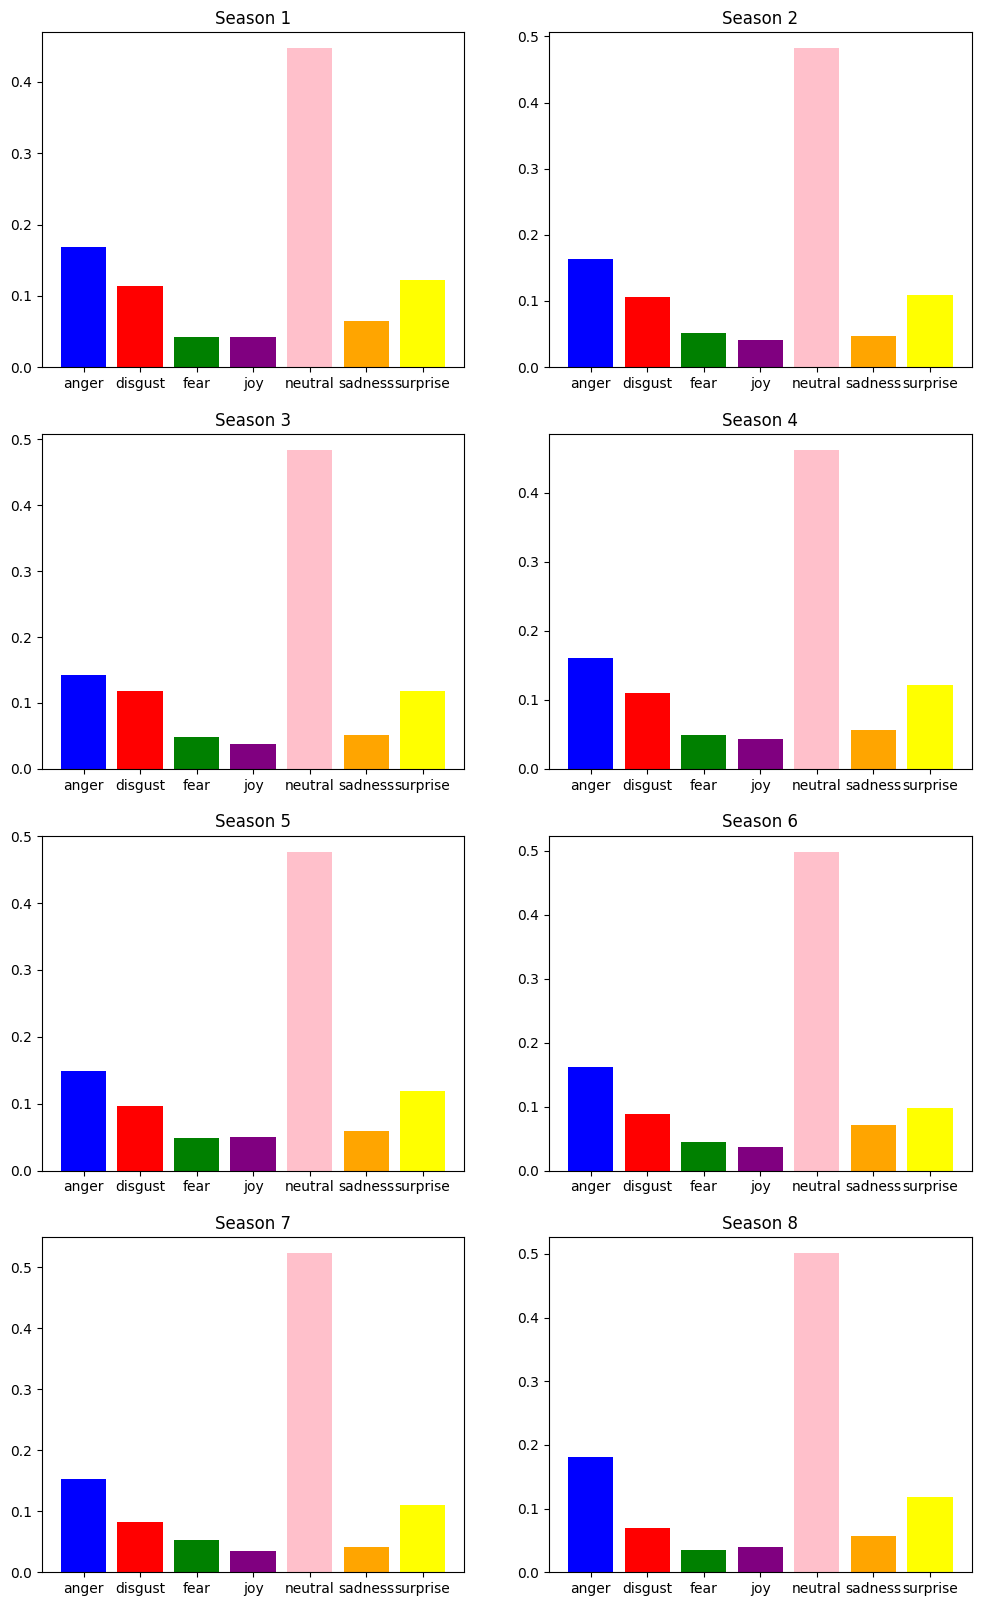

In [92]:
fig, axes = plt.subplots(4, 2, figsize=(12, 20))

s = 0

for i in range(len(axes)):
    for j in range(len(axes[0])):
            axes[i][j].bar(names, counts_list[s], label=bar_labels, color=colors)
            axes[i][j].set_title(f'Season {s + 1}')
            s += 1



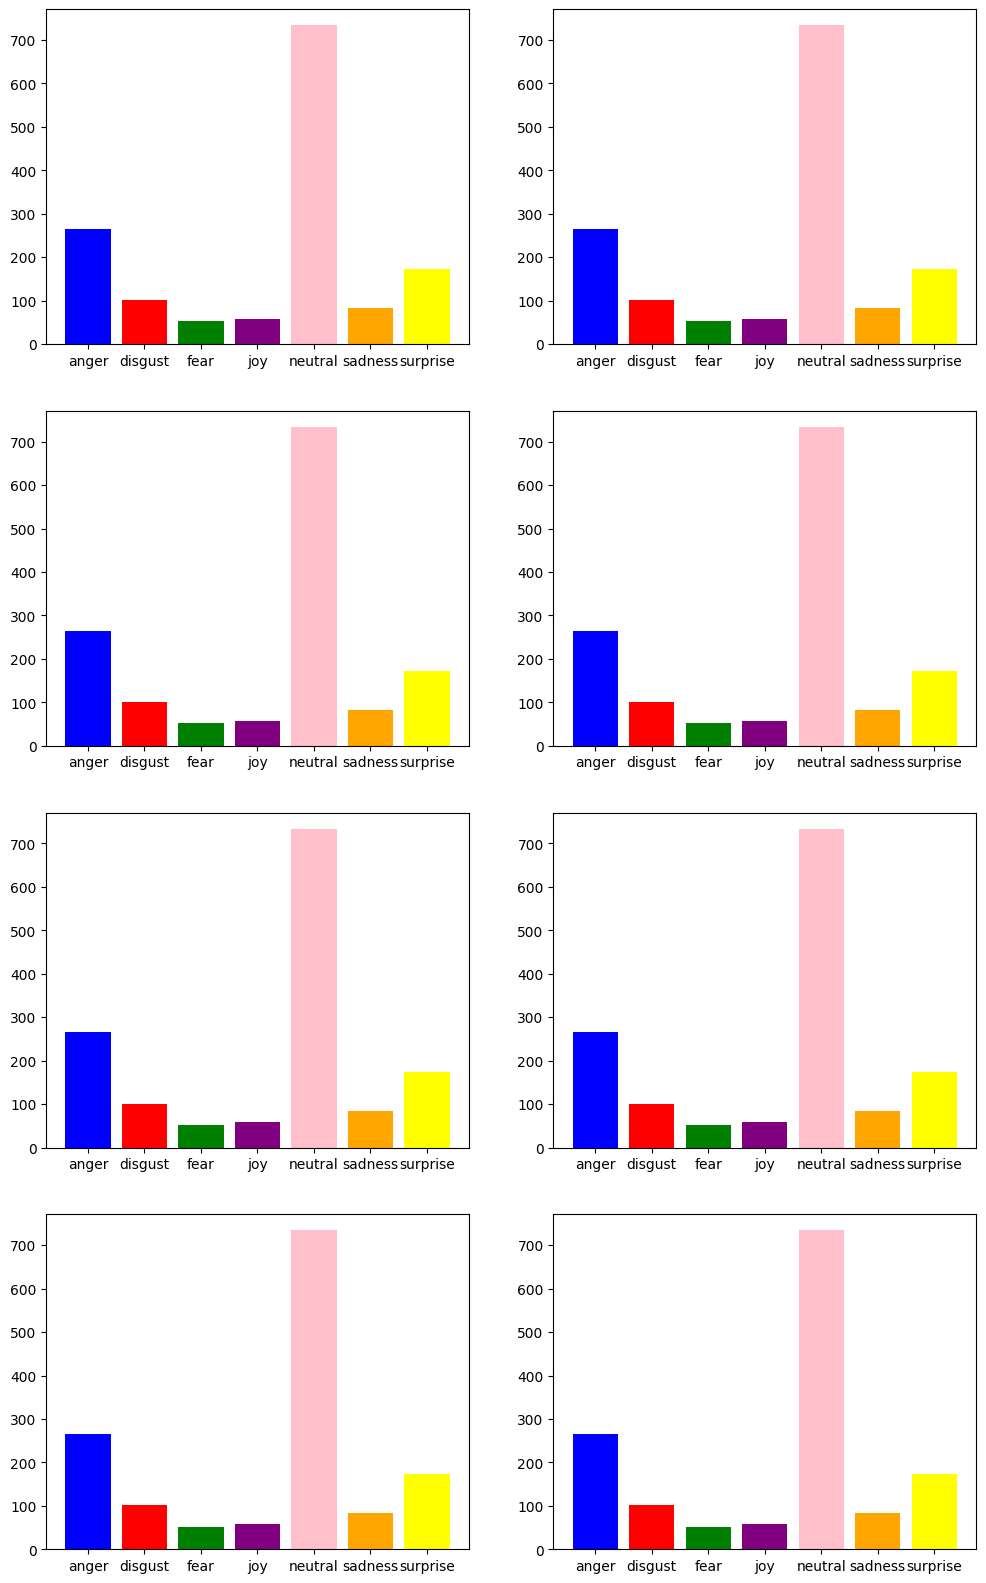

In [49]:
fig, axes = plt.subplots(4, 2, figsize=(12, 20))

for i in range(len(axes)):
    for j in range(len(axes[0])):
        axes[i][j].bar(names, counts, label=bar_labels, color=colors)
#plt.show()

<BarContainer object of 7 artists>

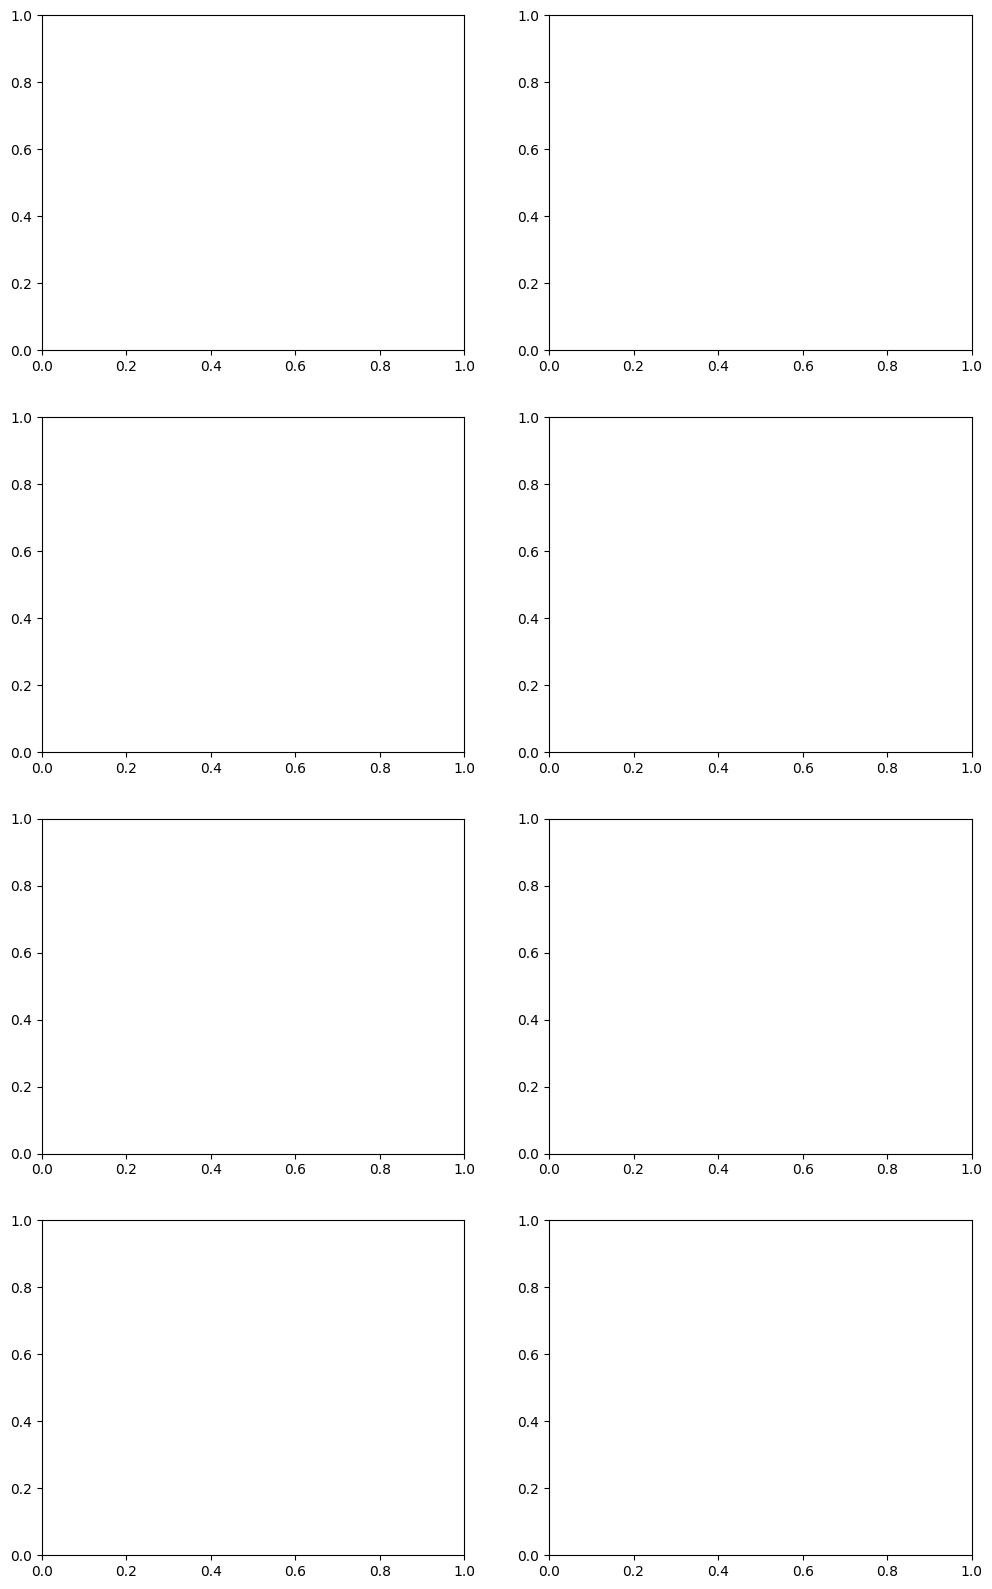

In [47]:
fig, axes = plt.subplots(4, 2, figsize=(12, 20))



ax[0,1].bar(names, counts, label=bar_labels, color=colors)
#bar(names, counts, label=bar_labels, color=colors)

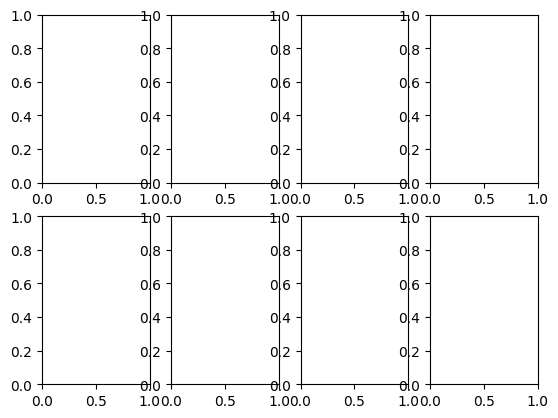

In [32]:
fig, ax = plt.subplots(2, 4)

ax[0,0] = 

In [21]:
counts = list(testy.iloc[0, 1:])

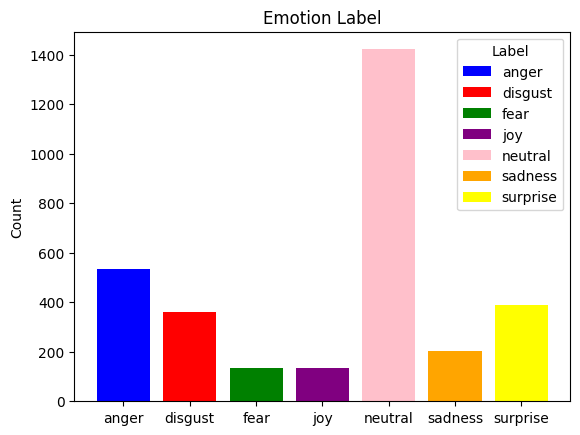

In [23]:
fig, ax = plt.subplots()

bar_labels = names

colors = ['blue', 'red', 'green', 'purple', 'pink', 'orange', 'yellow']

ax.bar(names, counts, label=bar_labels, color=colors)

ax.set_ylabel('Count')
ax.set_title('Emotion Label')
ax.legend(title='Label')

In [12]:
new_df = df.dropna()

NameError: name 'df' is not defined

In [25]:
df.iloc[18091]

Release Date               2016-05-15
Season                       Season 6
Episode                     Episode 4
Episode Title    Book of the Stranger
Name                           daario
Sentence                          NaN
Name: 18091, dtype: object

In [26]:
new_df.iloc[18091]


Release Date               2016-05-15
Season                       Season 6
Episode                     Episode 4
Episode Title    Book of the Stranger
Name                           daario
Sentence          What are you doing?
Name: 18094, dtype: object

In [21]:
result[1]['label']

'disgust'

In [28]:
pip install datasets

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 10.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.9/170.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 30.3 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 1.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.5/239.5 kB 2.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.3/124.3 kB 1.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.6/301.6 kB 7.0 MB/s eta 0:00:00:00:01
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024

In [32]:
from datasets import Dataset
dataset = Dataset.from_pandas(df)

In [33]:
dataset

Dataset({
    features: ['Release Date', 'Season', 'Episode', 'Episode Title', 'Name', 'Sentence'],
    num_rows: 23911
})

In [38]:
dataset_subset = dataset.select(list(range(20)))

In [42]:
pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [47]:
from transformers.pipelines.pt_utils import KeyDataset
from tqdm.auto import tqdm

labels = []
score = []

for out in tqdm(classifier(KeyDataset(dataset_subset, "Sentence"))):
    labels.append(out['label'])
    score.append(out['score'])

  0%|          | 0/20 [00:00<?, ?it/s]

In [236]:
lolli = df.query("Season == 'Season 2'")

In [239]:
second = lolli.iloc[0:10]

In [243]:
subset = pd.concat([first, second])

In [244]:
from transformers.pipelines.pt_utils import KeyDataset
from tqdm.auto import tqdm

ds_subset = Dataset.from_pandas(subset)

labels = []
score = []

for out in tqdm(classifier(KeyDataset(ds_subset, "Sentence"))):
    labels.append(out['label'])
    score.append(out['score'])

  0%|          | 0/20 [00:00<?, ?it/s]

In [245]:
subset['label'] = labels 
subset['score'] = score

In [247]:
subset.tail()

,Release Date,Season,Episode,Episode Title,Name,Sentence,label,score
3184,2012-04-01,Season 2,Episode 1,The North Remembers,joffrey lannister,Who's next?,neutral,0.766764
3185,2012-04-01,Season 2,Episode 1,The North Remembers,announcer,"Lothor Brune, freerider in the service of Lord...",disgust,0.368597
3186,2012-04-01,Season 2,Episode 1,The North Remembers,announcer,Ser Dontos the Red of House Hollard.,neutral,0.736822
3187,2012-04-01,Season 2,Episode 1,The North Remembers,announcer,Ser Dontos the Red of House Hollard!,neutral,0.308565
3188,2012-04-01,Season 2,Episode 1,The North Remembers,ser dontos,"Here I am. . Here I am. . Sorry, Your Grace. ....",sadness,0.963248


In [418]:
#### THIS ONE !!!!
frame = pd.DataFrame(subset[['Season', 'label']].value_counts().unstack())

In [423]:
counts = list(frame.iloc[1])

In [426]:
counts

[nan, 1.0, nan, 7.0, 2.0, nan]

In [424]:
names = list(frame.columns)

In [427]:
names

['anger', 'disgust', 'fear', 'neutral', 'sadness', 'surprise']

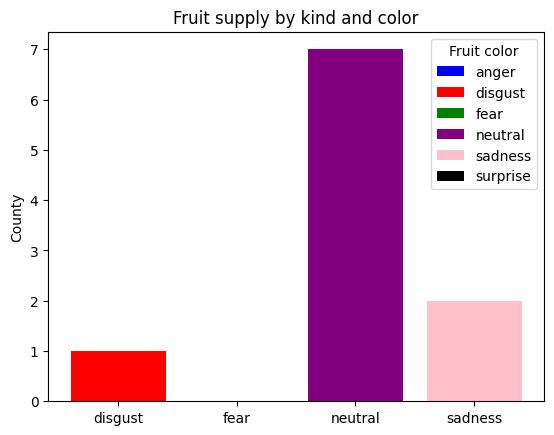

In [425]:
fig, ax = plt.subplots()

bar_labels = names

colors = ['blue', 'red', 'green', 'purple', 'pink', 'black']

ax.bar(names, counts, label=bar_labels, color=colors)

ax.set_ylabel('County')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')